In [1]:
# Описание
# скрипт использует LSTM для предсказания цены закрытия по акции $AAPL на основании данных за предыдущие 60 дней

In [2]:
# импорт библиотек
import math
import pandas as pd
import numpy as np
import pandas_datareader as web
import sklearn
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# получение данных 
df = web.DataReader('AAPL', data_source='yahoo', start='2011-01-01', end='2021-03-14')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.138556
2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.191467
2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.274836
2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.266529
2011-01-07,12.012500,11.853571,11.928214,12.004286,311931200.0,10.340052
...,...,...,...,...,...,...
2021-03-08,121.000000,116.209999,120.930000,116.360001,153918600.0,116.360001
2021-03-09,122.059998,118.790001,119.029999,121.089996,129159600.0,121.089996
2021-03-10,122.169998,119.449997,121.690002,119.980003,111760400.0,119.980003


In [4]:
# разведочный анализ
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2565.000000,2565.000000,2565.000000,2565.000000,2.565000e+03,2565.000000
mean,38.375475,37.570539,37.978782,37.986416,2.526082e+08,36.269919
std,27.755741,26.969935,27.389436,27.374905,1.994599e+08,27.944334
min,11.346429,11.089286,11.310000,11.261429,4.544800e+07,9.700181
25%,20.079643,19.702856,19.850357,19.859644,1.135284e+08,17.433689
50%,28.842501,28.312500,28.485001,28.514999,1.808720e+08,26.455313
75%,45.597500,44.542500,45.072498,44.992500,3.296664e+08,43.993488
max,145.089996,141.369995,143.600006,143.160004,1.880998e+09,142.946396


Text(0, 0.5, 'Close_price_USD')

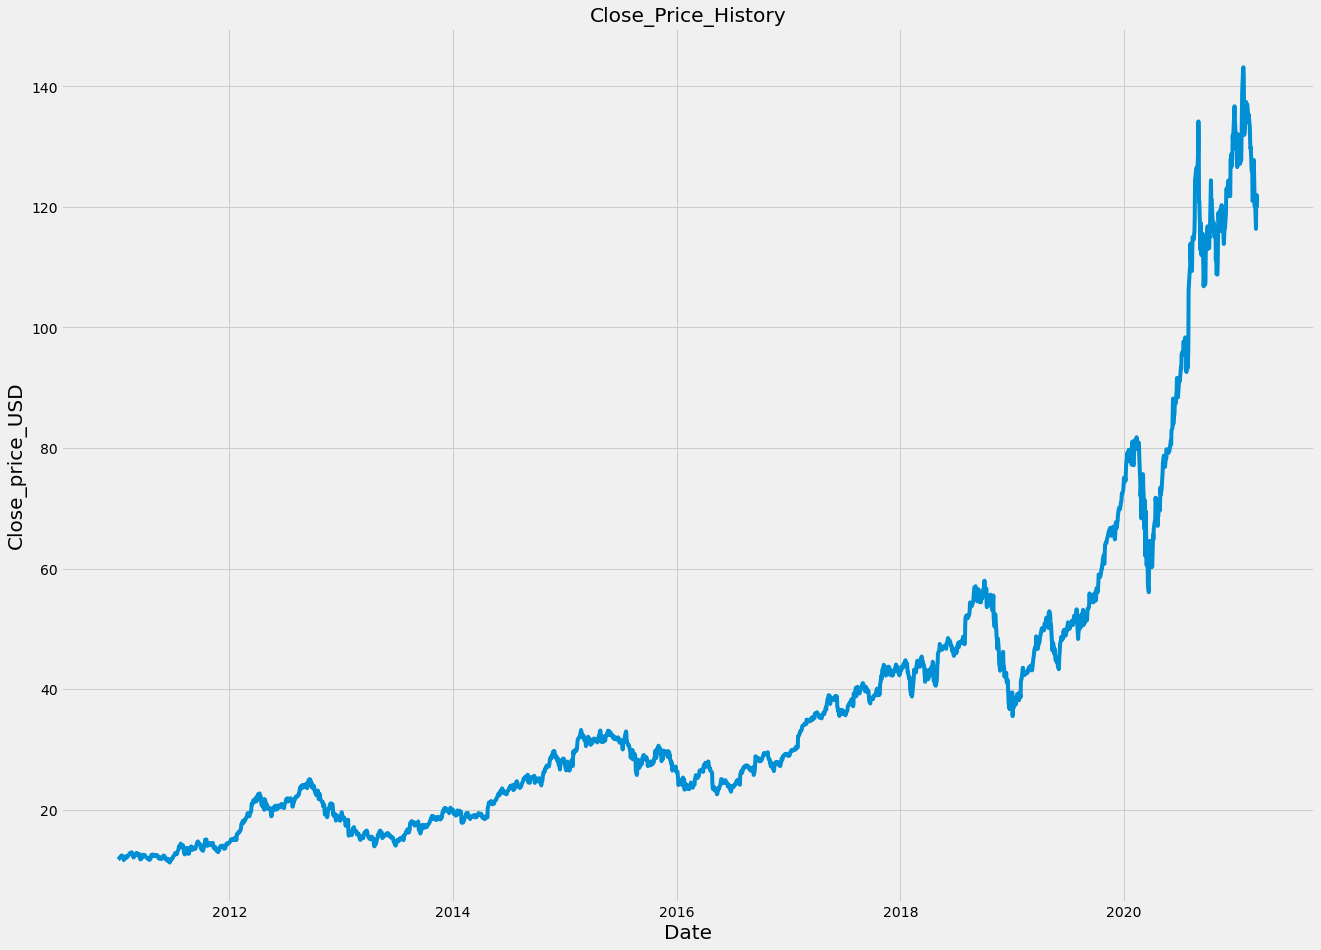

In [5]:
# визуализация
plt.figure(figsize=(20,15))
plt.title('Close_Price_History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close_price_USD',fontsize=20)

In [6]:
# создание фрэйма только с колонкой 'Close'
data = df.filter(['Close'])
# переводим data в numpy array
dataset = data.values
# отбираем строки для тренировки (80%)
training_data_len = math.ceil( len(dataset) * .8)

In [7]:
# масштабирование данных
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00385848],
       [0.00432421],
       [0.00505799],
       ...,
       [0.8242589 ],
       [0.8392704 ],
       [0.83221953]])

In [8]:
# создание тренировочного датасета
train_data = scaled_data[0:training_data_len , :]
# сплит сетов в x_train и y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00385848, 0.00432421, 0.00505799, 0.00498489, 0.00563203,
       0.00734601, 0.00712669, 0.00787942, 0.0082206 , 0.00897876,
       0.00685862, 0.00636853, 0.00470058, 0.00308679, 0.00599216,
       0.0070617 , 0.00772509, 0.00755179, 0.00562661, 0.0064985 ,
       0.0080446 , 0.00785235, 0.00761407, 0.00844263, 0.00989938,
       0.01079833, 0.01159982, 0.01061963, 0.01124511, 0.01187601,
       0.01207096, 0.01294556, 0.01163773, 0.00954197, 0.00630625,
       0.00739205, 0.00746244, 0.00889211, 0.01025951, 0.0092035 ,
       0.00996436, 0.0119789 , 0.01209804, 0.01084167, 0.01094997,
       0.01005913, 0.00848866, 0.00992916, 0.01035427, 0.00815291,
       0.00397762, 0.0052313 , 0.00415633, 0.00649308, 0.00700754,
       0.0064633 , 0.00802835, 0.00980732, 0.00950946, 0.00965027])]
[0.00901936926957736]

[array([0.00385848, 0.00432421, 0.00505799, 0.00498489, 0.00563203,
       0.00734601, 0.00712669, 0.00787942, 0.0082206 , 0.00897876,
       0.00685862, 0.00636853, 0.00

In [9]:
# конвертация x_train and y_train в numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
# изменяет датасет для LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1992, 60, 1)

In [11]:
# построение LSTM модели
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
# оптицизация
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
# тренировка модели
model.fit(x_train, y_train, batch_size=1, epochs=1)

1992/1992 [==============================] - 85s 39ms/step - loss: 3.2392e-04


In [14]:
# создание тестового датасета
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [15]:
# перевод в array
x_test = np.array(x_test)

In [16]:
 # изменяет датасет для LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(513, 60, 1)

In [17]:
# получение предсказанных значений
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [18]:
# получение RMSE модели (Среднеквадратическая ошибка)
rmse = np.sqrt( np.mean( predictions - y_test) **2 )
rmse

10.057691391913282

<ipython-input-19-d76054bb5691>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


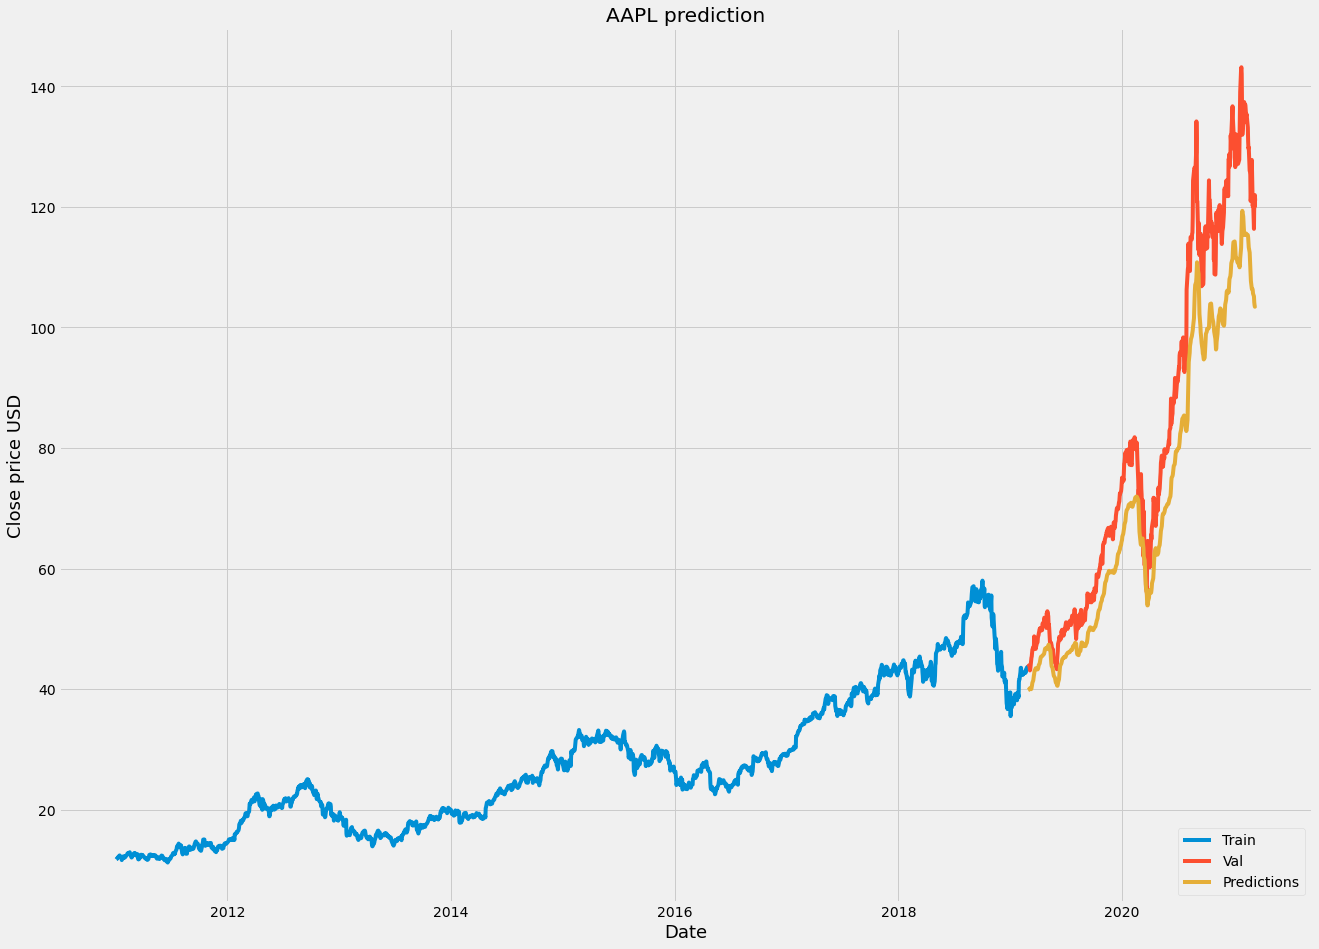

In [19]:
# графики
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(20,15))
plt.title('AAPL prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')


In [20]:
# сравнение цен: фактической и предсказанной
valid

,Close,Predictions
Date,,
2019-03-01,43.742500,39.837856
2019-03-04,43.962502,39.924957
2019-03-05,43.882500,40.033768
2019-03-06,43.630001,40.126617
2019-03-07,43.125000,40.164608
...,...,...
2021-03-08,116.360001,105.168793
2021-03-09,121.089996,104.164322
2021-03-10,119.980003,103.716484


In [25]:
# ошибки
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
print("MAE", mean_absolute_error(y_test, predictions)) # средняя абсолютная ошибка 
print("MAX", max_error(y_test, predictions)) # максимальная ошибка 
print(rmse)

MAE 10.066354591711688
MAX 29.74413299560547
10.057691391913282


In [ ]:
# Итоги


#1 - модель допукает существенную ошибку в прогнозировании (порядка 10 долларов в среднем)
#2 - решение для #2 это уменьшение периода прогнозирования с 60 дней до 14 или 7 (так range цены будет меньше и ошибка будет накапливаться меньше)